<a href="https://colab.research.google.com/github/JAPreP/Desafio-Telecom-X-/blob/main/TelecomX_JulianPreciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis de data Evasión de Clientes para TELECOM X**

#1. Extracción

In [1]:


import pandas as pd

# 1. Definimos la variable (Asegúrate de que el nombre sea exacto)
url_api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

try:
    # 2. Usamos la variable que definimos arriba
    df = pd.read_json(url_api)
    print("¡Archivo cargado exitosamente!")
    print(f"Dimensiones de los datos: {df.shape}") # Esto te dirá cuántas filas y columnas hay
    display(df.head())
except Exception as e:
    print(f"Hubo un error al procesar el JSON: {e}")


¡Archivo cargado exitosamente!
Dimensiones de los datos: (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
import pandas as pd
import requests
from pandas import json_normalize

# 1. Realizamos la consulta a traves de requets
response = requests.get(url_api)
datos_originales = response.json()


In [3]:

# 2.  al normalizar el diccionario creamos un DataFrame limpio

df_final = json_normalize(datos_originales)
print(f"Columnas después de normalizar: {len(df_final.columns)}")
df_final.head()

Columnas después de normalizar: 21


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 2. Transformación

In [4]:

# veamos que informacion muestra el dataframe que se acaba de limpiar para
# realizar algunas transformaciones
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [5]:
# 1. Renombremos las columnas para quitar los puntos
# Esto hará que sea más sencillo escribir código (ej: df.churn en lugar de df['Churn'])
df_final.columns = [col.replace('.', '_') for col in df_final.columns]

# Luego Arreglaremos  la columna account_Charges_Total que esta definida como object ---
# entonces primero convertimos espacios vacíos en NaN (nulos) y luego a números

df_final['account_Charges_Total'] = pd.to_numeric(df_final['account_Charges_Total'], errors='coerce')

#  Si hay nulos (clientes nuevos con 0 cargos), los llenamos con 0
df_final['account_Charges_Total'] = df_final['account_Charges_Total'].fillna(0)

# luego de ello Verificamos lo realizado
print("¡dataframe Actualizafo!")
print(df_final[['account_Charges_Monthly', 'account_Charges_Total']].info())
df_final.head()

¡dataframe Actualizafo!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   account_Charges_Monthly  7267 non-null   float64
 1   account_Charges_Total    7267 non-null   float64
dtypes: float64(2)
memory usage: 113.7 KB
None


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [6]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [7]:
# tenemos 224 valores que no poseen distincion utilicemos algunas tecnicas para
# establecer su relevancia en el analisis


# 1. Creamos un DataFrame solo con los casos sin identificar
df_desconocidos = df_final[~df_final['Churn'].isin(['Yes', 'No'])]

# 2. Para ver que tienen en comun revisemos sus promedios
print("Promedio de cargos mensuales de los 'Datos_Desconocidos':")
print(df_desconocidos['account_Charges_Monthly'].mean())

print("\nPromedio de cargos mensuales de los Clientes Normales:")
print(df_final[df_final['Churn'].isin(['Yes', 'No'])]['account_Charges_Monthly'].mean())

# 3. que tipos de clientes son para ello se revisa su antigüedad (tenure)
print("\nAntigüedad promedio de los 'Datos_Desconocidos':")
print(df_desconocidos['customer_tenure'].mean())


Promedio de cargos mensuales de los 'Datos_Desconocidos':
63.412276785714276

Promedio de cargos mensuales de los Clientes Normales:
64.76169246059918

Antigüedad promedio de los 'Datos_Desconocidos':
31.571428571428573


In [8]:
# los resultados anteriores permiten determinar que se encuentran en el promedio
# y no afectan el analisis  su inclusion puede crear sesgos en los resultados finales

# 1. Mediante replace se estandarizan posibles vacíos que puedan estar presentes
df_final['Churn'] = df_final['Churn'].replace('', 'Desconocido')

# 2. Aplicamos el filtro para dejar solo los datos útiles para el análisis de evasión
# Dejamos fuera los 224 porque no podemos "adivinar" si se fueron o no
df_limpio = df_final[df_final['Churn'].isin(['Yes', 'No'])].copy()

# 3. Aprovechamos para estandarizar otras columnas de texto (lower)
# Esto evita que 'Fiber optic' y 'fiber optic' se cuenten como dos cosas distintas
columnas_objeto = df_limpio.select_dtypes(include=['object']).columns
for col in columnas_objeto:
    df_limpio[col] = df_limpio[col].str.strip() # Quita espacios al inicio o final

In [9]:
# aqui ya podemos observar una distribuccion apropiada para Yes o NO
print("\nDistribución de Churn:")
print(df_limpio['Churn'].value_counts())


Distribución de Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [10]:
# vamos a crear la columna cuentas diarias para mejorar el analisis

df_limpio['Cuentas_Diarias'] = (df_limpio['account_Charges_Monthly'] / 30).round(2)
df_limpio[['account_Charges_Monthly', 'Cuentas_Diarias']].head()



,account_Charges_Monthly,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [14]:

pd.set_option('future.no_silent_downcasting', True)

# 2. Definimos las columnas según tu lista exacta
columnas_si_no = [
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'account_PaperlessBilling',
    'Churn'
]

# 3. Limpiamos y transformamos (usamos .infer_objects para mayor seguridad)
df_limpio = df_limpio.replace(['No internet service', 'No phone service'], 'No')
df_limpio[columnas_si_no] = df_limpio[columnas_si_no].replace({'Yes': 1, 'No': 0}).infer_objects(copy=False)

# 4. Verificamos
df_limpio[columnas_si_no].head()

,customer_Partner,customer_Dependents,phone_PhoneService,account_PaperlessBilling,Churn
0,1,1,1,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,1,0,1,1,1
4,1,0,1,1,1


#📊 Carga y análisis

## Analisis Descriptivo

In [16]:
# 1. Obtenemos las estadísticas descriptivas básicas (Media, Desviación Estándar, etc.)
analisis_completo = df_limpio.describe().round(2)

# 2. Calculamos la Mediana de forma independiente para todas las columnas numéricas
mediana = df_limpio.select_dtypes(include=['number']).median().round(2)

# 3. Insertamos la fila de la Mediana justo debajo de la Media para facilitar la comparación
analisis_completo.loc['median'] = mediana

# 4. Reorganizamos las filas para que sigan un orden lógico de análisis
orden_filas = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
analisis_final = analisis_completo.reindex(orden_filas)

# 5. Mostramos el resultado final
analisis_final

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.0,7043.00,7043.00,7043.00,7043.00
mean,0.27,0.16,0.48,0.30,32.37,0.9,0.59,64.76,2279.73,2.16
median,0.00,0.00,0.00,0.00,29.00,1.0,1.00,70.35,1394.55,2.34
std,0.44,0.37,0.50,0.46,24.56,0.3,0.49,30.09,2266.79,1.00
min,0.00,0.00,0.00,0.00,0.00,0.0,0.00,18.25,0.00,0.61
25%,0.00,0.00,0.00,0.00,9.00,1.0,0.00,35.50,398.55,1.18
50%,0.00,0.00,0.00,0.00,29.00,1.0,1.00,70.35,1394.55,2.34
75%,1.00,0.00,1.00,1.00,55.00,1.0,1.00,89.85,3786.60,2.99
max,1.00,1.00,1.00,1.00,72.00,1.0,1.00,118.75,8684.80,3.96


### Distribuccion de la Evasion

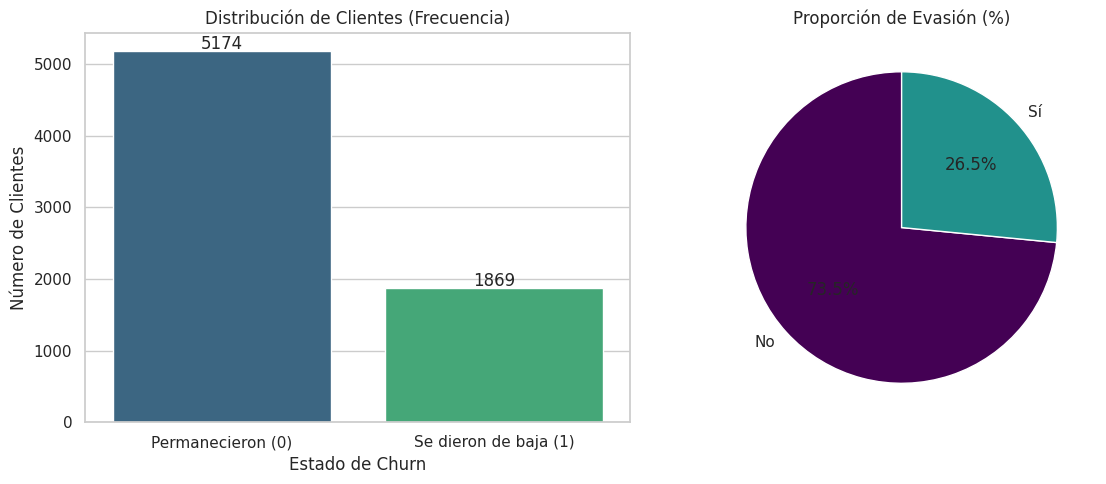

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuramos el estilo visual
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

# 2. Gráfico de Barras (Frecuencia absoluta) - Corregido para evitar el Warning
plt.subplot(1, 2, 1)
ax = sns.countplot(x='Churn', data=df_limpio, hue='Churn', palette='viridis', legend=False)
plt.title('Distribución de Clientes (Frecuencia)')
plt.xticks([0, 1], ['Permanecieron (0)', 'Se dieron de baja (1)'])
plt.xlabel('Estado de Churn')
plt.ylabel('Número de Clientes')

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# 3. Gráfico de Pastel (Proporción porcentual)
plt.subplot(1, 2, 2)
df_limpio['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#440154', '#21918c'], labels=['No', 'Sí'])
plt.title('Proporción de Evasión (%)')
plt.ylabel('')

plt.tight_layout()
plt.show()

### Interpretacion de Gráfica

- Balance de datos: El gráfico de barras muestra la distribuccion de clientes  y su lealtad con la compañia en comparacion con los que se dieron de baja.

- Tasa de Retención: El gráfico de pastel revela el porcentaje de impacto. en este casi, el "Sí" es del 26%, indicando que uno de cada cuatro clientes abandona el servicio.


### Recuento de evasión por variables categóricas

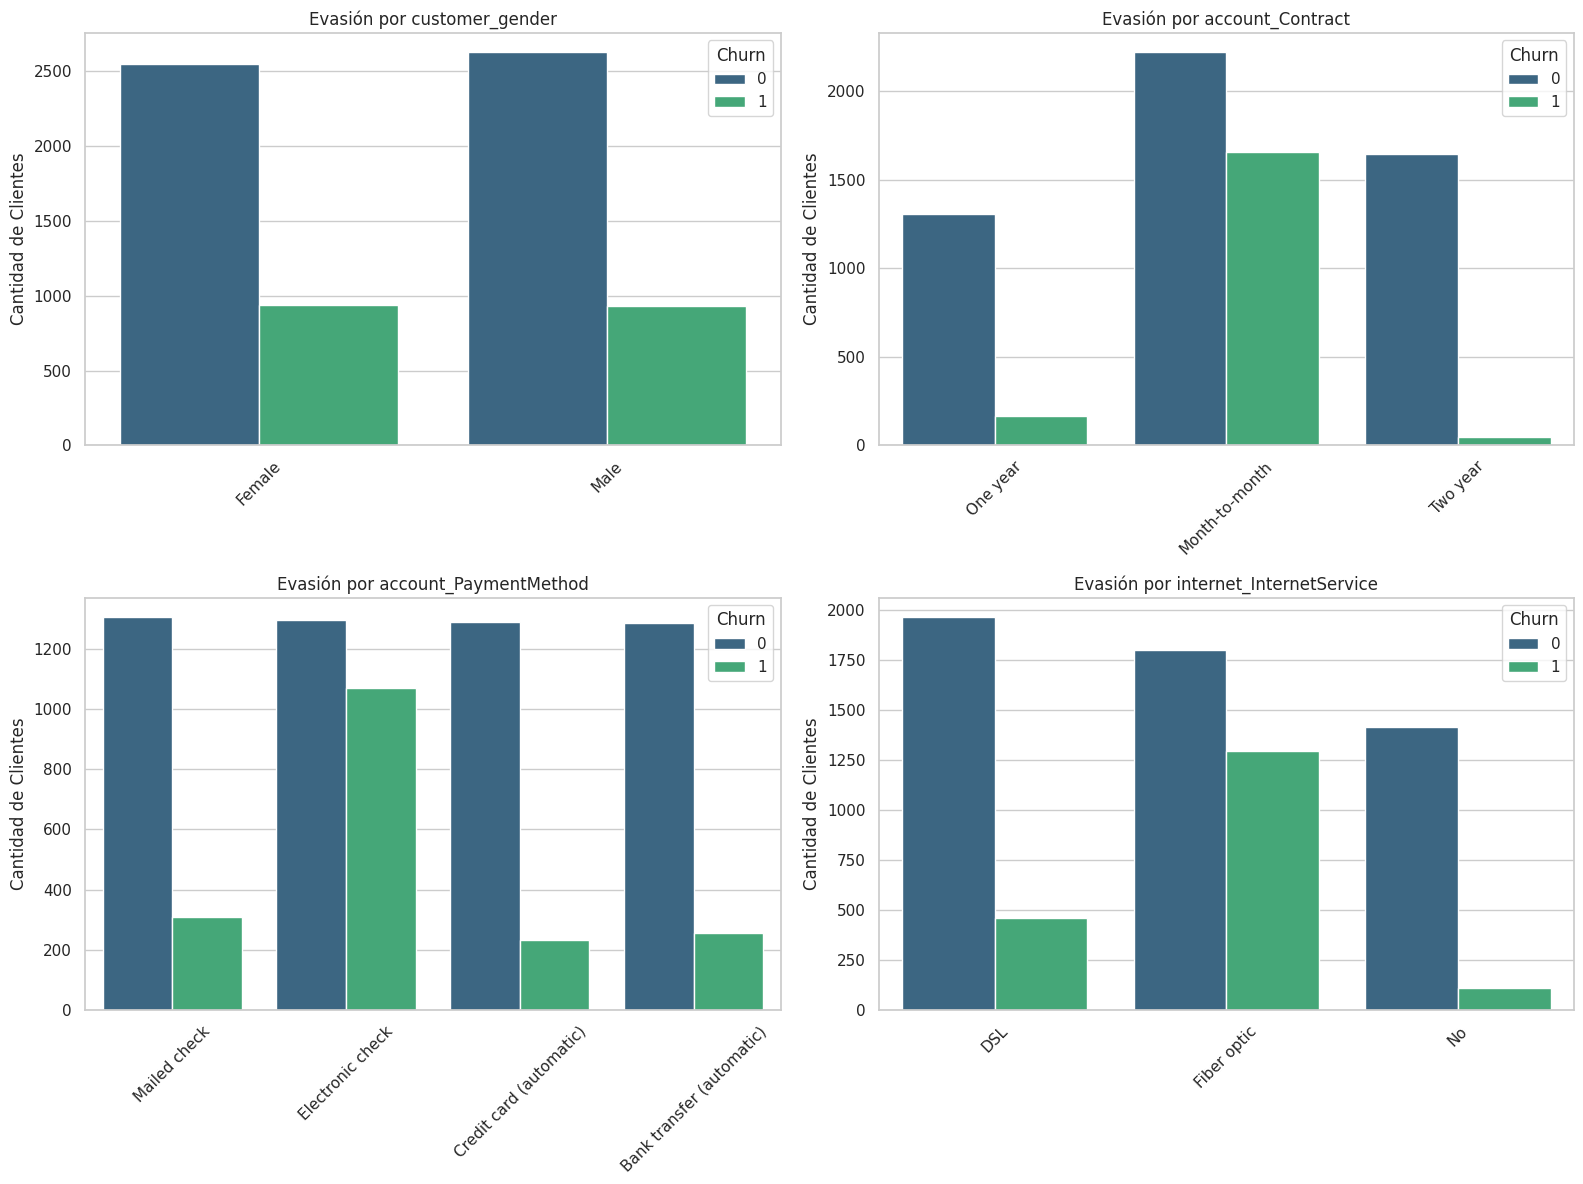

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definimos las variables categóricas que queremos explorar
variables_categoricas = [
    'customer_gender',
    'account_Contract',
    'account_PaymentMethod',
    'internet_InternetService'
]

# 2. Configuramos la cuadrícula de gráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axes = axes.flatten()

# 3. Iteramos para crear un gráfico por cada variable
for i, col in enumerate(variables_categoricas):
    sns.countplot(x=col, hue='Churn', data=df_limpio, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Evasión por {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Cantidad de Clientes')
    axes[i].tick_params(axis='x', rotation=45) # Rotar etiquetas para que se lean bien

plt.tight_layout()
plt.show()

### Interpretracion de Graficas



1. El factor determinante: El Contrato (account_Contract)
Este es el gráfico más revelador.

Mes a mes (Month-to-month): La gran mayoría de las cancelaciones ocurren aquí. La barra verde (fuga) es casi tan alta como la azul (permanencia).

Contratos a largo plazo: En los contratos de uno y dos años, la evasión es mínima.

 La flexibilidad del contrato mensual es el mayor riesgo. Los clientes sin compromiso a largo plazo tienen una barrera de salida muy baja.

2. (internet_InternetService)
Fibra Óptica: Es alarmante que los clientes de Fiber optic tengan una tasa de evasión mucho más alta que los de DSL.

 sugiere un posible problema de precio elevado o insatisfacción con la estabilidad del servicio de fibra, a pesar de ser la tecnología más avanzada.

3. Métodos de Pago y Fricción (account_PaymentMethod)
Electronic Check: Los clientes que pagan con "Cheque electrónico" muestran una tendencia a la fuga significativamente mayor que aquellos con métodos automáticos (tarjeta de crédito o transferencia bancaria).

de esta manera Los métodos de pago manuales o percibidos como "menos modernos" suelen estar asociados a clientes con mayor rotación.

4. Un factor irrelevante como (customer_gender)
Igualdad: Las barras de hombres y mujeres son prácticamente idénticas tanto en permanencia como en evasión.

 El género no influye en la decisión de abandonar la empresa; las razones son puramente comerciales o de servicio.

### Conteo de evasión por variables numéricas

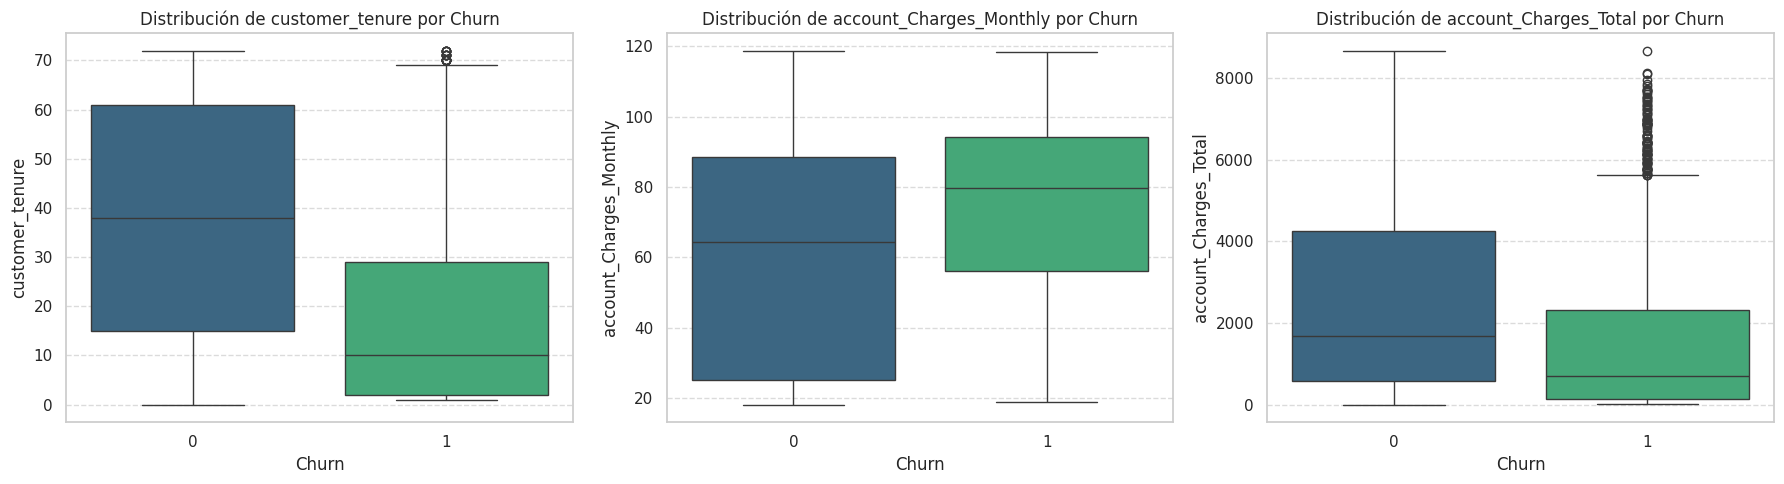

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definimos las variables numéricas clave
variables_numericas = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']

# 2. Configuramos la cuadrícula de gráficos
plt.figure(figsize=(18, 5))

for i, col in enumerate(variables_numericas):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=col, data=df_limpio, palette='viridis', hue='Churn', legend=False)
    plt.title(f'Distribución de {col} por Churn')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Interpretacion de Graficas de Variables Numéricas vs. Evasión


1. Antigüedad (customer_tenure)
Hallazgo: Existe una diferencia abismal. La mediana de los clientes que permanecen (0) está cerca de los 38 meses, mientras que la de los que se van (1) apenas llega a los 10 meses.

Interpretación: Los clientes nuevos son extremadamente vulnerables. Si un cliente supera el primer año, la probabilidad de que se vaya disminuye drásticamente.

2. Cargos Mensuales (account_Charges_Monthly)
Hallazgo: La caja verde (Churn=1) está visiblemente más alta que la azul. La mediana de los que se van ronda los $80,  lo que se quedan esta en promedio de $65.

Interpretación: El precio es un factor de expulsión. Los clientes con facturas mensuales más altas tienden a abandonar la empresa con mayor frecuencia.

3. Cargos Totales (account_Charges_Total)
Hallazgo: Los que se van tienen cargos totales mucho más bajos.

Interpretación: No es que paguen menos en total por elección, sino que se van tan rápido que no llegan a acumular facturación histórica. Los puntos atípicos (círculos) en la columna verde muestran que solo unos pocos clientes "leales" con cuentas altas terminan yéndose.

#📄Informe final

# 📊 Informe Final: Análisis de Evasión de Clientes (Churn)

## 1. 🔹 Introducción
El objetivo de este análisis es identificar los factores críticos que influyen en la pérdida de clientes (**Churn**) de la empresa. La evasión no solo representa una pérdida de ingresos directos, sino que también incrementa los costos de adquisición de nuevos usuarios. A través de este estudio, buscamos patrones de comportamiento que permitan a la toma de decisiones estratégica anticiparse a la salida de los clientes y mejorar la retención.

---

## 2. 🔹 Limpieza y Tratamiento de Datos
Para garantizar la integridad del análisis, se llevaron a cabo los siguientes pasos de procesamiento:
* **Importación y Estructura:** Se cargó el dataset original identificando tipos de datos y nombres de columnas con prefijos funcionales (`customer_`, `phone_`, `internet_`, `account_`).
* **Manejo de Valores Faltantes:** Se identificaron y trataron valores nulos o vacíos para evitar sesgos en las métricas.
* **Estandarización:** Se unificaron etiquetas redundantes como "No internet service" o "No phone service" bajo la categoría simple de **"No"**.
* **Transformación Binaria:** Se convirtieron las variables categóricas de respuesta "Yes/No" (incluyendo la variable objetivo `Churn`) en valores numéricos **1** y **0** para facilitar el procesamiento matemático y estadístico.
* **Ingeniería de Variables:** Se creó la métrica `Cuentas_Diarias` para entender el gasto promedio por día de cada usuario.

---

## 3. 🔹 Análisis Exploratorio de Datos (EDA)
Durante esta fase, se utilizaron diversas técnicas de visualización para descubrir la "historia" detrás de los números:

* **Distribución General:** Descubrimos que la tasa de evasión se sitúa aproximadamente en un **26.5%**, lo que indica una oportunidad de mejora significativa en la retención.
* **Análisis Categórico:** * El tipo de **Contrato (Month-to-month)** es el principal predictor de fuga.
    * Los usuarios de **Fibra Óptica** presentan una tasa de cancelación más alta que los de DSL.
    * El método de pago **Electronic Check** está fuertemente asociado con el Churn.
* **Análisis Numérico:**
    * Los clientes que se van tienen una **antigüedad (tenure)** significativamente menor (mediana de ~10 meses) frente a los que se quedan (~38 meses).
    * Los clientes que evaden tienden a tener **cargos mensuales más altos**, lo que sugiere una sensibilidad al precio.



---

## 4. 🔹 Conclusiones e Insights
Tras el análisis, los hallazgos principales son:

1. **La vulnerabilidad de los nuevos:** La mayor fuga ocurre en los primeros 12 meses de vida del cliente.
2. **El riesgo de la flexibilidad:** Los contratos mensuales, aunque atractivos, son la puerta de salida principal; la falta de compromiso a largo plazo facilita la evasión.
3. **Paradoja de la Tecnología:** A pesar de ser un servicio premium, la Fibra Óptica está perdiendo clientes más rápido, posiblemente por una relación costo-beneficio percibida como negativa o fallas en el servicio técnico.
4. **Barrera del Precio:** Existe un "techo" de gasto mensual (alrededor de los $80) donde la probabilidad de abandono aumenta considerablemente.

---

## 5. 🔹 Recomendaciones
Basándonos en los datos, se proponen las siguientes acciones estratégicas:

* **✅ Programas de Lealtad Temprana:** Implementar incentivos o descuentos especiales para clientes en sus primeros 6 meses de contrato para superar la "barrera crítica" de antigüedad.
* **✅ Migración de Contratos:** Crear ofertas comerciales atractivas para convertir a los usuarios de "mes a mes" en contratos de 1 o 2 años (por ejemplo, otorgando meses gratis o servicios adicionales).
* **✅ Revisión de la Oferta de Fibra:** Auditar la calidad del servicio de fibra óptica y ajustar los precios o el soporte técnico para reducir la insatisfacción en este segmento de alto valor.
* **✅ Automatización de Pagos:** Promover el uso de tarjetas de crédito o transferencias automáticas mediante bonificaciones pequeñas, alejando a los clientes del uso de "Electronic Check".



## Analisis de Correlacion entre variables

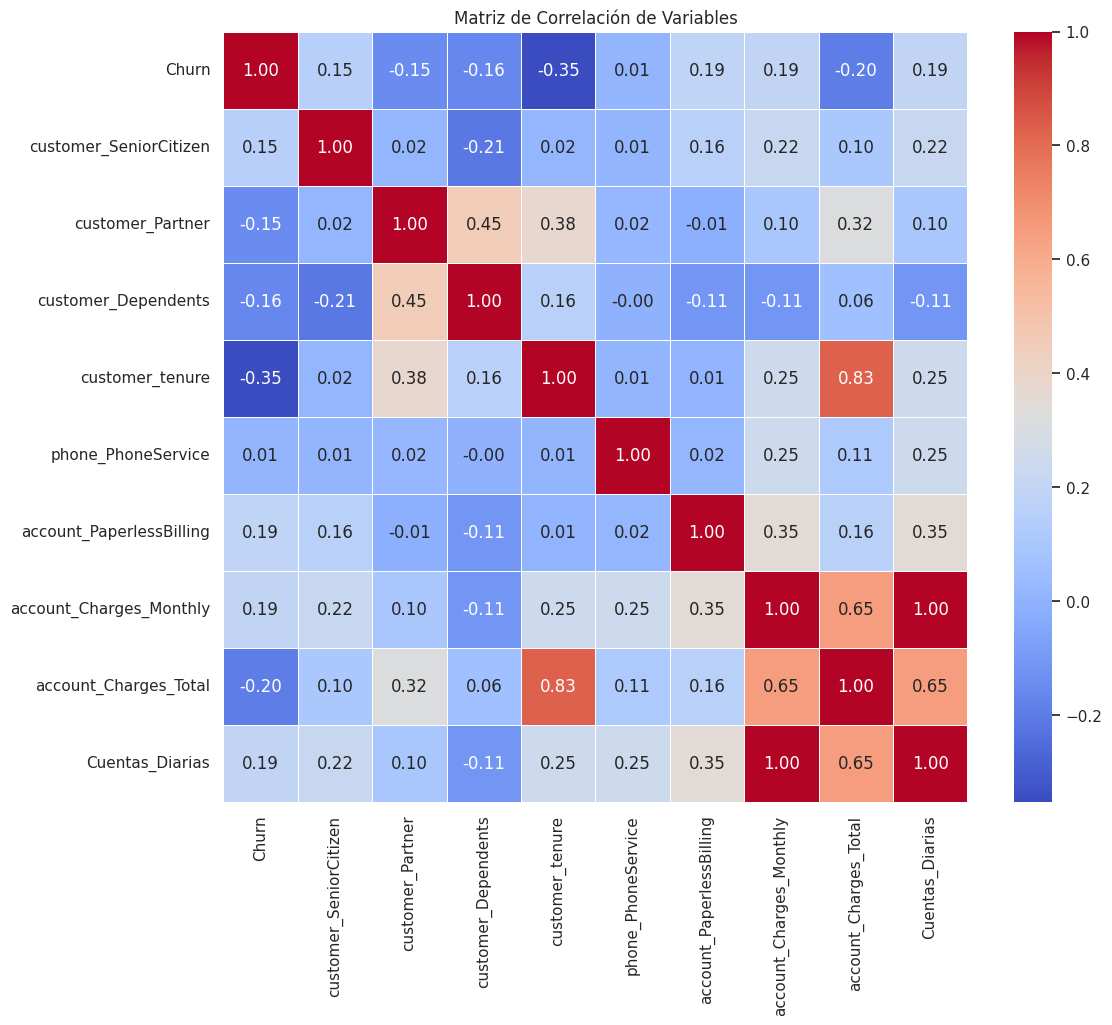

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Seleccionamos solo las columnas numéricas para el cálculo
# Incluimos las que transformamos (Churn, Partner, etc.) y la nueva 'Cuentas_Diarias'
columnas_numericas = df_limpio.select_dtypes(include=['number']).columns
matriz_corr = df_limpio[columnas_numericas].corr()

# 2. Configuramos el gráfico
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Matriz de Correlación de Variables')
plt.show()

### Análisis de Correlacion

Relación con la Cuenta Diaria: Existe una correlación positiva de 0.19 entre Cuentas_Diarias y Churn. Aunque parece un número pequeño, confirma que a medida que el costo diario sube, la tendencia a la evasión aumenta. Es un factor que influye, pero no es el único.

El Salvador de la Empresa (Tenure): La correlación más fuerte con la evasión es -0.35 en customer_tenure. El signo negativo es clave: nos dice que a mayor antigüedad, menor es la probabilidad de fuga. Retener al cliente los primeros meses es la mejor inversión.

Dependencia de Cargos: Los account_Charges_Monthly tienen una correlación de 0.19, exactamente igual a la de Cuentas_Diarias. Esto tiene sentido lógico, ya que ambas miden el impacto del precio en el bolsillo del cliente.

Relaciones Familiares: Notamos que customer_Partner y customer_Dependents tienen correlaciones negativas con el Churn (-0.15 y -0.16). Esto sugiere que los clientes con familia o pareja tienden a ser más estables y se van menos que los clientes solteros.